In [12]:
from tqdm import tqdm, trange
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdmolops
from rdkit.Chem import PropertyMol
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs

from computeDescriptors import dataBlocks, CustomMolModularDataset

# parse in the SMILES stings from FreeSolv

In [2]:
table=pd.read_csv("FreeSolv.csv", sep=';')
table.rename(columns=lambda x: x.strip(), inplace=True)
needed_info=table.iloc[:,[0,1,3,4]]
needed_info

,# compound id (and file prefix),SMILES,experimental value (kcal/mol),experimental uncertainty (kcal/mol)
0,mobley_1017962,CCCCCC(=O)OC,-2.49,0.6
1,mobley_1019269,CCCCO,-4.72,0.6
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,-3.04,0.1
3,mobley_1036761,C1CCC(CC1)N,-4.59,0.6
4,mobley_1046331,c1ccc(cc1)OC=O,-3.82,0.6
...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,-0.78,0.6
638,mobley_9942801,CCc1ccc(cc1)C,-0.95,0.6
639,mobley_994483,CCBr,-0.74,0.6
640,mobley_9974966,CC(C)SC(C)C,-1.21,0.6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:01<00:00, 410.87it/s]


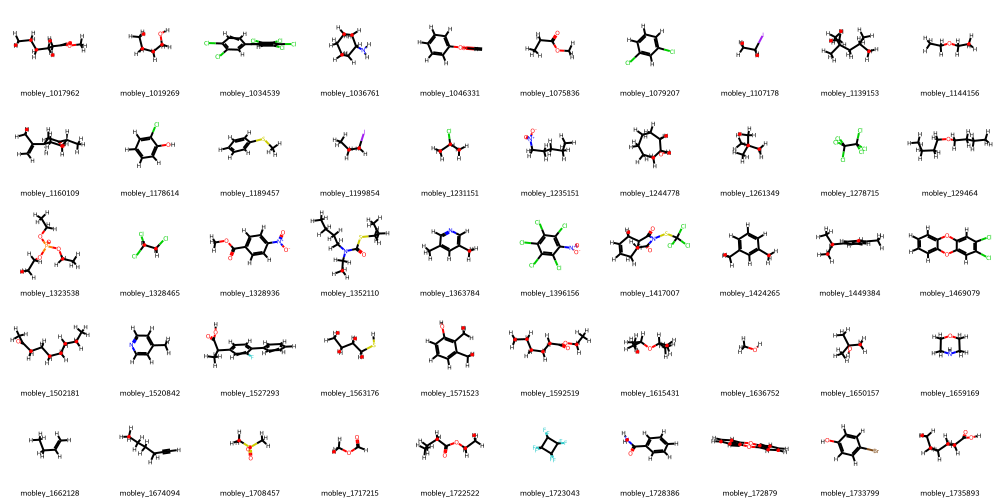

In [13]:
ligs = []
legends = []
for i in trange(needed_info.shape[0]):
    lig = Chem.MolFromSmiles(needed_info.iloc[i,1]) # smiles
    lig = rdmolops.AddHs(lig)
    lig.SetProp("ID", str(needed_info.iloc[i,0])) # compound id
    lig.SetProp("dG", str(needed_info.iloc[i,2]))
    lig.SetProp("err", str(needed_info.iloc[i,3]))
    
    # run embeding to generate 3d structure for some descriptors
    params = AllChem.ETKDGv3()
    params.useSmallRingTorsions = True
    AllChem.EmbedMultipleConfs(lig, numConfs = 1 , params = params)
    
    lig = PropertyMol.PropertyMol(lig)
    ligs.append(lig)
    legends.append(str(needed_info.iloc[i,0]))
Draw.MolsToGridImage(ligs,molsPerRow=10,subImgSize=(100,100), legends=legends)

(array([ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     , 69.60564],
      dtype=float32), array([-3.04])) 
# descriptors = 6574


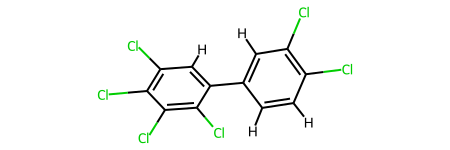

In [7]:
DB=CustomMolModularDataset(ligs)
print(DB[2], "\n# descriptors =", DB[0][0].shape[0])
ligs[2]

## iterate through all ligands and cache descriptors to HDD

In [15]:
for i in trange(needed_info.shape[0]):
    DB[i]
    print(f"shape is {DB[i][0].shape}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:00<00:00, 43336.98it/s]

shape is (6574,)
shape is (6574,)
shape is (6679,)
shape is (6574,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679,)
shape is (6679

In [14]:
import pickle
with open("all_ligands.pickle", 'wb') as f:
    pickle.dump(ligs, f)